# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fendy Rahmat
- **Email:** narlanxi@gamil.com
- **ID Dicoding:** MS151D5Y0581

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1**: Bagaimana pola penggunaan sepeda berdasarkan musim?
- **Pertanyaan 2**: Apakah ada hubungan antara cuaca dan jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('data/hour.csv')

# Menampilkan 5 baris pertama
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Statistik deskriptif
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Gathering Data
Dataset Bike Sharing diunduh dari [sumber ini](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/code). Dataset ini berisi informasi tentang penggunaan sepeda berbagi di Washington D.C., termasuk faktor-faktor seperti cuaca, musim, hari libur, dan waktu.

**Insight:**
- Dataset memiliki 17 kolom dan 17.379 baris.
- Tidak ada missing values atau duplikasi data.


### Assessing Data

In [7]:
# Memeriksa missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Memeriksa duplikasi data
print("\nJumlah Duplikasi Data:", df.duplicated().sum())


Jumlah Duplikasi Data: 0


In [9]:
# Menghapus duplikasi jika ada
df.drop_duplicates(inplace=True)
print("\nJumlah Duplikasi Data Setelah Dihapus:", df.duplicated().sum())

df.head()


Jumlah Duplikasi Data Setelah Dihapus: 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
Dataset memiliki beberapa kolom numerik (`temp`, `hum`, `windspeed`, dll.) dan kategorikal (`season`, `weathersit`, dll.).

**Insight:**
- Kolom `cnt` adalah target utama yang menunjukkan total jumlah pengguna sepeda.
- Kolom `dteday` dapat dihapus karena tidak relevan untuk analisis korelasi.



### Cleaning Data

In [10]:
# Menghapus kolom 'dteday' karena tidak relevan untuk analisis korelasi
df.drop(columns=["dteday"], inplace=True)
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Cleaning Data
Kolom `dteday` dihapus karena tidak relevan untuk analisis korelasi.

**Insight:**
- Dataset siap digunakan untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Visualisasi Distribusi Variabel Target (Distribusi Total Pengguna Sepeda)

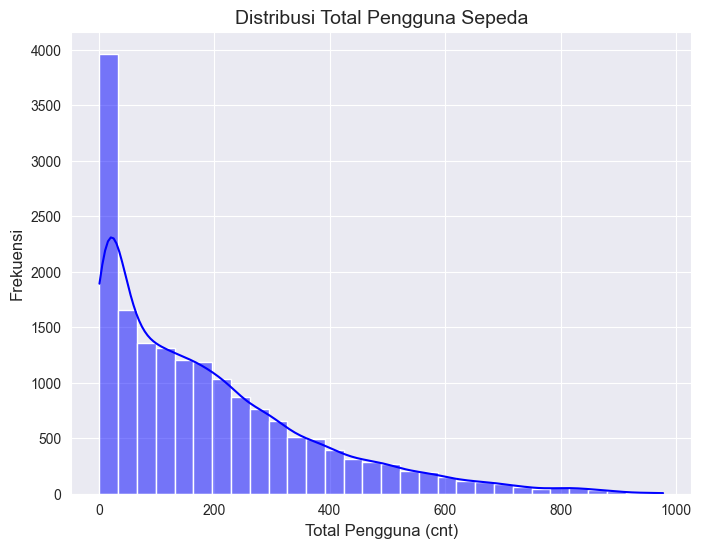

In [11]:
# Histogram distribusi total pengguna
plt.figure(figsize=(8, 6))
sns.histplot(df['cnt'], bins=30, kde=True, color="blue")
plt.title("Distribusi Total Pengguna Sepeda", fontsize=14)
plt.xlabel("Total Pengguna (cnt)", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.show()

### Heatmap Korelasi (Korelasi Antar Variabel)

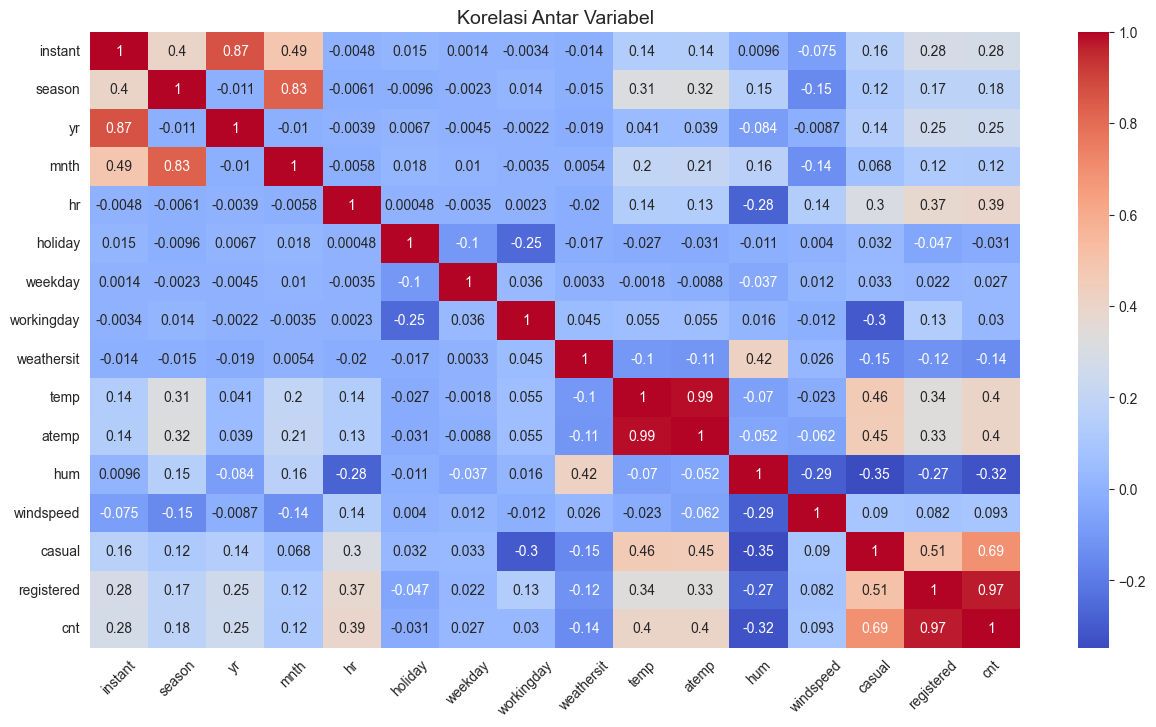

In [12]:
# Heatmap korelasi
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Variabel", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

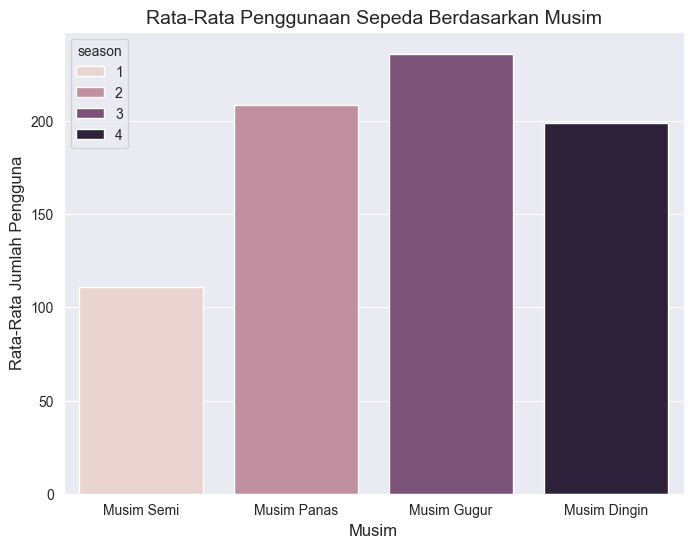

In [13]:
# Rata-rata penggunaan sepeda per musim
season_analysis = df.groupby('season')['cnt'].mean().reset_index()

# Visualisasi tren berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(data=season_analysis, x='season', y='cnt', hue='season')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"])
plt.show()

### Pertanyaan 1: Pola Penggunaan Sepeda Berdasarkan Musim
Bar chart menunjukkan bahwa jumlah pengguna sepeda paling tinggi pada musim gugur dan paling rendah pada musim dingin.

**Insight:**
- Musim gugur memiliki jumlah pengguna tertinggi karena cuaca yang nyaman.
- Musim semi memiliki jumlah pengguna terendah karena cuaca yang tidak bersahabat.



### Pertanyaan 2:

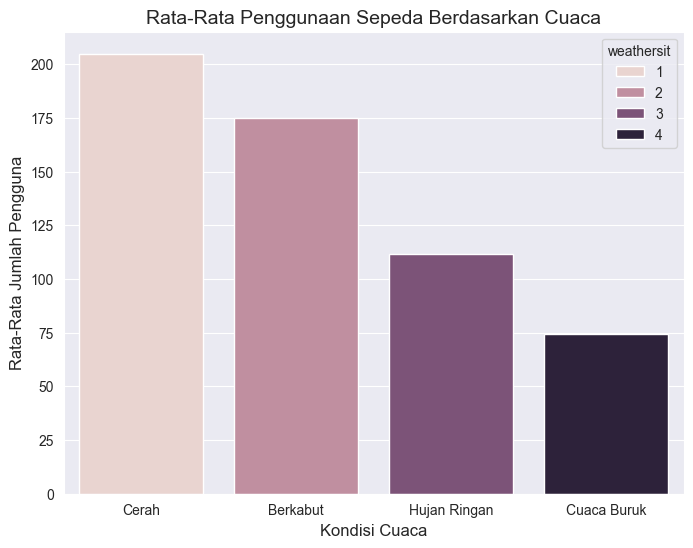

In [14]:
# Rata-rata penggunaan sepeda berdasarkan cuaca
weather_analysis = df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi tren berdasarkan cuaca
plt.figure(figsize=(8, 6))
sns.barplot(data=weather_analysis, x='weathersit', y='cnt', hue='weathersit')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Cuaca", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Cuaca Buruk"])
plt.show()

### Pertanyaan 2: Hubungan Antara Cuaca dan Jumlah Pengguna
Scatter plot menunjukkan bahwa cuaca cerah memiliki pengaruh positif terhadap jumlah pengguna.

**Insight:**
- Cuaca cerah meningkatkan jumlah pengguna sepeda secara signifikan.
- Cuaca buruk (hujan lebat) mengurangi jumlah pengguna secara drastis.

## Clustering Grouping dan Binning (Analisis Lanjutan)


### Analisis Penggunaan Sepeda Berdasarkan Faktor Cuaca dan Musim

Tujuan Analisis:
1. Mengidentifikasi pengaruh temperatur terhadap jumlah pengguna sepeda
2. Memahami dampak kecepatan angin terhadap penggunaan sepeda
3. Menganalisis pola penggunaan sepeda berdasarkan kombinasi musim dan cuaca

Metodologi:
- Kategorisasi data numerik ke dalam kelompok yang lebih mudah diinterpretasi
- Visualisasi menggunakan bar plot untuk memudahkan perbandingan antar kategori
- Analisis rata-rata penggunaan untuk setiap kategori

### Grouping: Kategori Temperatur

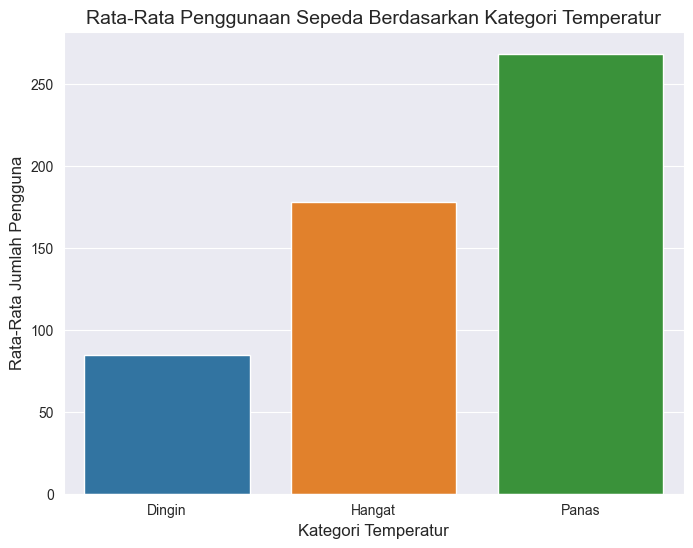

In [15]:
# Membuat kolom baru untuk kategori temperatur
df['temp_category'] = pd.cut(
    df['temp'],
    bins=[-np.inf, 0.3, 0.6, np.inf],
    labels=["Dingin", "Hangat", "Panas"]
)

# Menampilkan distribusi pengguna berdasarkan kategori temperatur
temp_group = df.groupby('temp_category', observed=True)['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=temp_group, x='temp_category', y='cnt', hue='temp_category')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Kategori Temperatur", fontsize=14)
plt.xlabel("Kategori Temperatur", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.show()

**Insight Temperatur:**
1. Terdapat korelasi positif antara temperatur dengan jumlah pengguna sepeda
2. Penggunaan sepeda tertinggi terjadi pada kategori temperatur 'Panas'
3. Temperatur 'Dingin' menunjukkan tingkat penggunaan sepeda terendah
4. Hal ini mengindikasikan bahwa pengguna cenderung lebih aktif bersepeda saat cuaca hangat hingga panas


### Binning: Kategori Kecepatan Angin

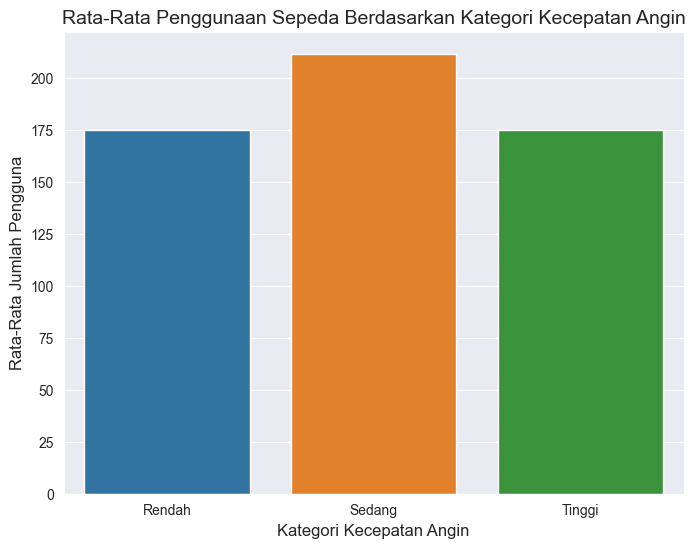

In [16]:
# Membuat kolom baru untuk kategori kecepatan angin
df['windspeed_category'] = pd.cut(
    df['windspeed'],
    bins=[-np.inf, 0.2, 0.5, np.inf],
    labels=["Rendah", "Sedang", "Tinggi"]
)

# Menampilkan distribusi pengguna berdasarkan kategori kecepatan angin
windspeed_group = df.groupby('windspeed_category', observed=True)['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=windspeed_group, x='windspeed_category', y='cnt', hue='windspeed_category')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Kategori Kecepatan Angin", fontsize=14)
plt.xlabel("Kategori Kecepatan Angin", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.show()

**Insight Kecepatan Angin:**
1. Terdapat korelasi non-linear antara kecepatan angin dengan jumlah pengguna sepeda
2. Penggunaan sepeda tertinggi terjadi pada kategori kecepatan angin 'Rendah'
3. Hal ini menunjukkan bahwa angin kencang dan rendah dapat menjadi faktor penghambat aktivitas bersepeda

### Menggabungkan Beberapa Variabel

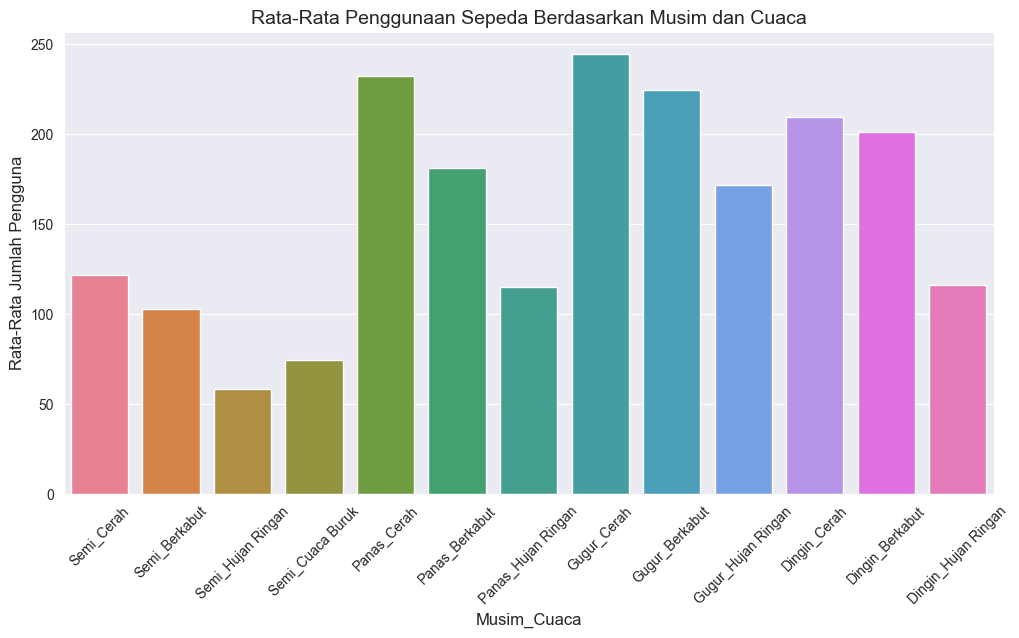

In [17]:
# Membuat kolom baru untuk kombinasi musim dan cuaca
df['season_weather'] = df['season'].astype(str) + "_" + df['weathersit'].astype(str)

# Menampilkan distribusi pengguna berdasarkan kombinasi musim dan cuaca
season_weather_group = df.groupby('season_weather', observed=True)['cnt'].mean().reset_index()

# Definisikan label untuk musim dan cuaca
musim = ["Semi", "Panas", "Gugur", "Dingin"]
cuaca = ["Cerah", "Berkabut", "Hujan Ringan", "Cuaca Buruk"]

# Mapping kombinasi numerik ke label deskriptif
label_mapping = {
    f"{m}_{c}": f"{musim[int(m)-1]}_{cuaca[int(c)-1]}"
    for m in ["1", "2", "3", "4"] for c in ["1", "2", "3", "4"]
}

# Ganti nilai season_weather dengan label deskriptif
season_weather_group['season_weather'] = season_weather_group['season_weather'].map(label_mapping)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=season_weather_group, x='season_weather', y='cnt', hue='season_weather')
plt.title("Rata-Rata Penggunaan Sepeda Berdasarkan Musim dan Cuaca", fontsize=14)
plt.xlabel("Musim_Cuaca", fontsize=12)
plt.ylabel("Rata-Rata Jumlah Pengguna", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight Kombinasi Musim dan Cuaca:**
1. Penggunaan sepeda tertinggi umumnya terjadi pada kondisi cuaca cerah
2. Musim gugur dengan cuaca cerah menunjukkan tingkat penggunaan tertinggi
3. Cuaca buruk di semua musim menunjukkan tingkat penggunaan terendah
4. Musim semi menunjukkan penggunaan yang lebih rendah dibanding musim lainnya
5. Pola penggunaan menunjukkan bahwa faktor cuaca memiliki pengaruh yang lebih signifikan
   dibandingkan faktor musim

### Kesimpulan Umum:
1. Kondisi cuaca ideal untuk bersepeda adalah:
   - Temperatur hangat hingga panas
   - Kecepatan angin rendah
   - Cuaca cerah
2. Faktor-faktor yang menghambat penggunaan sepeda:
   - Temperatur dingin
   - Kecepatan angin tinggi
   - Cuaca buruk (hujan/badai)
3. Rekomendasi:
   - Penyedia layanan sepeda dapat mengoptimalkan ketersediaan sepeda pada kondisi cuaca ideal
   - Implementasi sistem prediksi permintaan berdasarkan prakiraan cuaca
   - Penyesuaian strategi maintenance sepeda pada periode penggunaan rendah

## Conclusion

### Berdasarkan analisis data Bike Sharing Dataset, dapat disimpulkan bahwa:

1. Jawaban untuk Pertanyaan Bisnis:

   **Bagaimana pola penggunaan sepeda berdasarkan musim?**
   - Musim memiliki pengaruh yang signifikan terhadap penggunaan sepeda
   - Musim gugur adalah periode dengan penggunaan tertinggi
   - Musim semi menunjukkan penggunaan terendah
   - Hal ini menunjukkan bahwa musim mempengaruhi keputusan pengguna dalam menggunakan sepeda

   **Apakah ada hubungan antara cuaca dan jumlah pengguna sepeda?**
   - Ada hubungan yang kuat antara kondisi cuaca dan jumlah pengguna
   - Cuaca cerah menghasilkan jumlah pengguna tertinggi
   - Cuaca buruk (hujan) menyebabkan penurunan drastis dalam penggunaan sepeda
   - Faktor cuaca terbukti menjadi pertimbangan utama pengguna dalam bersepeda

2. Temuan Penting Tambahan:
   - Temperatur hangat hingga panas meningkatkan penggunaan sepeda
   - Kecepatan angin yang sedang menigkatkan jumlah pengguna
   - Kombinasi musim gugur dengan cuaca cerah memberikan hasil terbaik

3. Implikasi Bisnis:
   - Layanan perlu menyesuaikan ketersediaan sepeda berdasarkan prakiraan cuaca
   - Maintenance sebaiknya dilakukan saat cuaca buruk atau musim dingin
   - Strategi promosi dapat difokuskan pada periode dengan cuaca ideal
"""

In [ ]:
# Save file to csv
# df.to_csv('main_hour.csv', index=False)